## Importing Libraries

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
import os
import matplotlib.pyplot as plt

In [2]:
# Looking up tensorflow version
print('tensorflow', tf.__version__)

tensorflow 2.11.0


## Loading data

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory ("data/Alzheimer_s Dataset/train",
                                                                validation_split=0.2, subset='training', seed=42)

Found 5121 files belonging to 4 classes.
Using 4097 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory ("data/Alzheimer_s Dataset/train",
                                                             validation_split=0.2, subset='validation', seed=42)

Found 5121 files belonging to 4 classes.
Using 1024 files for validation.


In [5]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory ("data/Alzheimer_s Dataset/test", seed=42)

Found 1279 files belonging to 4 classes.


## Looking at the data

In [6]:
classnames = train_ds.class_names
classnames

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

In [9]:
NUM_IMAGES = []

for label in classnames:
    dir_name = "data/Alzheimer_s Dataset/train/" + label[:-2] +'ed'
    NUM_IMAGES.append(len([name for name in os.listdir(dir_name)]))
    
NUM_IMAGES,classnames

([717, 52, 2560, 1792],
 ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'])

## Data Viz

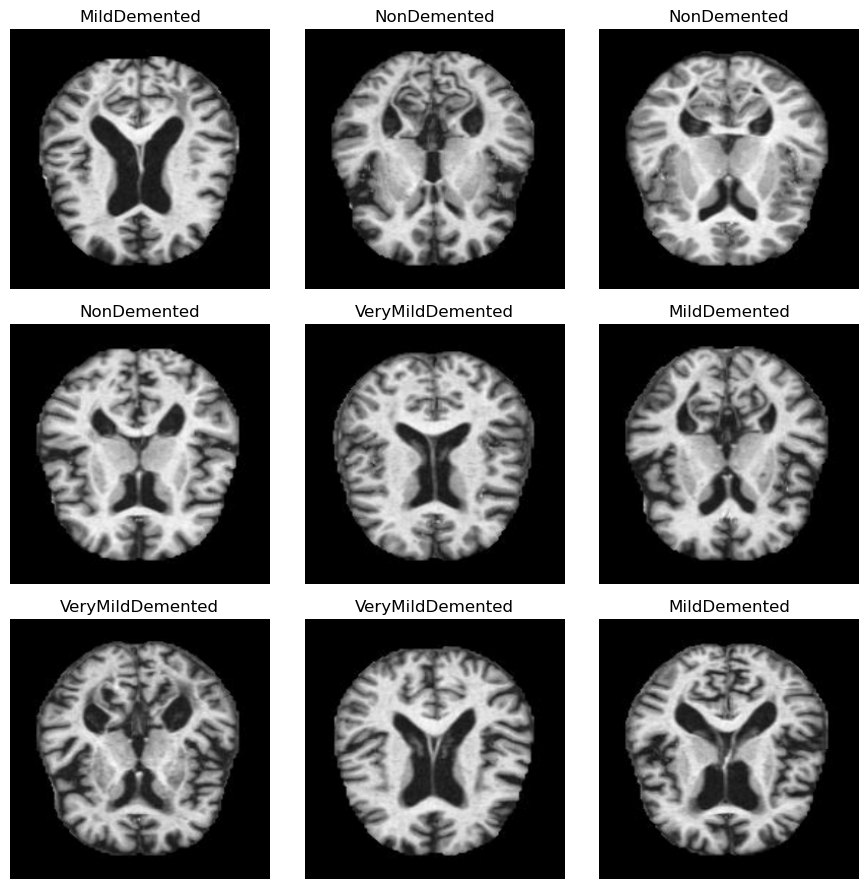

In [13]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9,9))

for images, labels in train_ds.take(1):
    for i, ax in enumerate(axs.flatten()):
        ax.imshow(images[i].numpy().astype("uint8"))
        ax.set_title(train_ds.class_names[labels[i]])
        ax.axis("off")
plt.tight_layout()
plt.show()

## Feature Engineering

In [19]:
def one_hot_label(image, label):
    label = tf.one_hot(label, len(classnames))
    return image, label

train_ds = train_ds.map(one_hot_label, num_parallel_calls = tf.data.experimental.AUTOTUNE)
val_ds = val_ds.map(one_hot_label, num_parallel_calls = tf.data.experimental.AUTOTUNE)